<a href="https://colab.research.google.com/github/Joel4ngel/AMP-Tech/blob/master/emisiones_CO2_KMEANS_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Autor: Joel Taquía

#Llamo las librias que usaré
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler 
%matplotlib inline

#1. Cargo la data que previamente lo subi a mi DRIVE
ruta= '//content//drive//My Drive//Colab Notebooks//emision_co2.csv'

df = pd.read_csv(ruta,sep=';',)

#Elimino la ultima columna,pues la ultima columna del csv se guardo con ';'
df=df.drop(df.columns[-1], axis='columns')


In [ ]:
#2.	Selecciono las variables que usaré en el PCA (no hay una variable ind. eso es lo que se quiere obtener,la etiqueta)
X = df.iloc[:,2:9] 

In [ ]:
X.head() #5 primeros datos.

,construccion,industrias,otros combustibles,transporte,manufacturacion,fugas,energia
0,457.2,714.80,186.0,686.1,3029.8,0.00,4455.4
1,460.6,35.27,46.1,1597.5,438.6,11.93,2360.2
2,486.9,53.74,63.1,753.0,377.9,1.86,1289.8
3,96.6,101.40,57.1,219.2,433.0,1.91,995.1
4,122.4,26.25,14.1,237.3,169.4,32.66,1007.7


In [ ]:
X.describe()

,construccion,industrias,otros combustibles,transporte,manufacturacion,fugas,energia
count,60.000000,60.000000,60.000000,60.000000,60.00000,60.000000,60.000000
mean,49.626667,22.494167,10.531667,106.546667,106.84500,3.424333,261.493333
std,103.055667,92.311740,26.078717,237.159882,394.68706,7.496758,666.722179
min,0.300000,0.000000,0.000000,5.100000,1.30000,0.000000,15.100000
25%,5.125000,2.112500,0.850000,16.025000,11.02500,0.000000,32.675000
50%,14.150000,4.315000,3.600000,34.200000,29.35000,0.245000,63.750000
75%,42.275000,15.160000,9.400000,105.600000,62.05000,2.007500,171.025000
max,486.900000,714.800000,186.000000,1597.500000,3029.80000,32.660000,4455.400000


# **PCA**

In [ ]:
#3. Normalizo las variables
#===========================
from sklearn.preprocessing import StandardScaler
Z = StandardScaler().fit_transform(X)

In [ ]:
# Calculo la matriz de varianzas y covarianza
cov_mat=np.cov(Z.T)
pd.DataFrame(cov_mat)

,0,1,2,3,4,5,6
0,1.016949,0.599876,0.796729,0.907334,0.680806,0.130058,0.871780
1,0.599876,1.016949,0.952578,0.400725,1.008847,-0.033699,0.890897
2,0.796729,0.952578,1.016949,0.616455,0.975546,-0.006527,0.958993
3,0.907334,0.400725,0.616455,1.016949,0.498685,0.170850,0.775867
4,0.680806,1.008847,0.975546,0.498685,1.016949,-0.015654,0.939005
5,0.130058,-0.033699,-0.006527,0.170850,-0.015654,1.016949,0.093534
6,0.871780,0.890897,0.958993,0.775867,0.939005,0.093534,1.016949


In [ ]:
#4.Obtengo los autovectores y autovalores de la matriz de covarianza
#====================================================================
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

In [ ]:
#AUTOVALORES ya ordenados
pd.DataFrame(eig_vals)

,0
0,5.014361
1,1.180004
2,0.784299
3,0.092163
4,0.031250
5,0.014836
6,0.001730


In [ ]:
#AUTOVECTORES(filas)
pd.DataFrame(eig_vecs)

,0,1,2,3,4,5,6
0,0.394220,0.272163,-0.354254,-0.723022,-0.336277,0.090464,0.031546
1,0.402633,-0.301203,0.342116,0.100254,-0.174592,0.419253,0.643283
2,0.436498,-0.144816,0.103748,-0.271321,0.824249,-0.154472,-0.029521
3,0.337705,0.419765,-0.513900,0.542596,0.200980,0.332747,0.011602
4,0.422016,-0.237382,0.258454,0.122625,-0.239177,0.241108,-0.753908
5,0.031933,0.762260,0.644828,-0.023980,0.031801,0.022049,-0.008015
6,0.445852,0.025290,0.001133,0.289052,-0.280072,-0.789203,0.125472


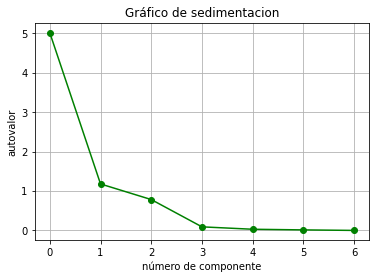

In [ ]:
#Grafico de sedimentacion
plt.plot(eig_vals,'go-')
plt.ylabel('autovalor')
plt.xlabel('número de componente')
plt.title('Gráfico de sedimentacion')
plt.grid()
plt.show()

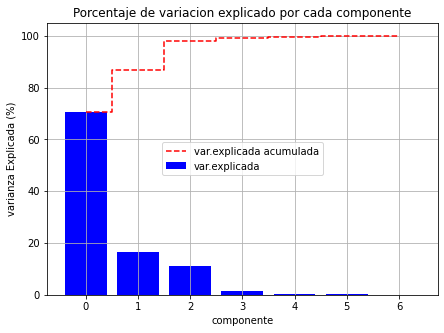

In [ ]:
#Gráfico de varianza simples y acumuladas

# A partir de los autovalores, calculamos la varianza explicada
tot = sum(eig_vals)

#varianza porcentual para cada autovalor
var_exp = [(i/tot)*100 for i in eig_vals] #sorted(eig_vals, reverse=True)

#Hago una suma acumulada
cum_var_exp = np.cumsum(var_exp)

# Representamos en un diagrama de barras la varianza explicada por cada autovalor y la acumulada
with plt.style.context('seaborn-pastel'):
    plt.figure(figsize=(7,5))

    plt.bar(range(7), var_exp, align='center',label='var.explicada', color='b')
    plt.step(range(7), cum_var_exp, where='mid', linestyle='--', label='var.explicada acumulada',color='r')
    plt.ylabel('varianza Explicada (%)')
    plt.xlabel('componente')
    plt.legend(loc='center')
    plt.title('Porcentaje de variacion explicado por cada componente')
    plt.grid()

In [ ]:
#Resumen de las varianzas
data={'Yi':[i for i in range(1,8)],'autovalores':eig_vals,'vza.explic(%)':var_exp,'vza.explic.acum.(%)':cum_var_exp}

resumen=pd.DataFrame(data)
blankIndex=[''] * len(resumen)
resumen.index=blankIndex
resumen

,Yi,autovalores,vza.explic(%),vza.explic.acum.(%)
,1,5.014361,70.439829,70.439829
,2,1.180004,16.576252,87.016082
,3,0.784299,11.017536,98.033618
,4,0.092163,1.294668,99.328286
,5,0.031250,0.438992,99.767278
,6,0.014836,0.208417,99.975695
,7,0.001730,0.024305,100.000000


# **PROYECCIONES**
**TOMANDO 2 DIMENSIONES** : 87% de variabilidad

In [ ]:
#5.Selecciono los 2 autovectores más grandes correspondientes a sus CP

# El 1er y 2do autovalor los coloco en una matriz Base: B
B = np.array([eig_vecs[0],eig_vecs[1]])

# Las nuevas variables obtenidas de dimension: 60x2
Y = Z.dot(B.T)

print('Matriz Base:')
pd.DataFrame(B.T)

Matriz Base:


,0,1
0,0.394220,0.402633
1,0.272163,-0.301203
2,-0.354254,0.342116
3,-0.723022,0.100254
4,-0.336277,-0.174592
5,0.090464,0.419253
6,0.031546,0.643283


In [ ]:
#Componentes principales y su cetegoria
W=pd.DataFrame(Y, columns=['pc1', 'pc2'])
W.head()

,pc1,pc2
0,-2.907810,4.479806
1,-3.529065,5.057005
2,-1.130707,3.382422
3,-0.832115,1.072419
4,0.178653,2.724244


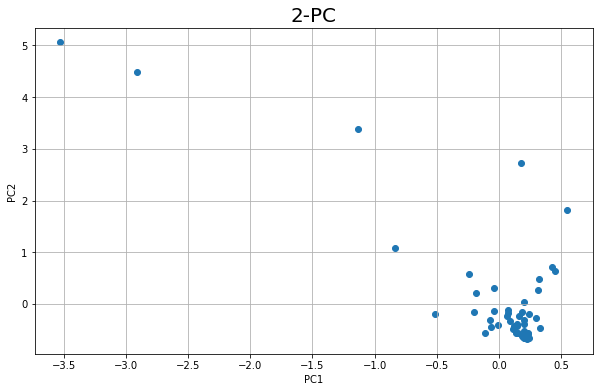

In [ ]:
#Proyeccion reducida a 2D con sus categorias
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(1,1,1)

ax.scatter(W.iloc[:,0], W.iloc[:,1])#, c = color) W.iloc[:,0:2]

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('2-PC', fontsize = 20)
ax.grid()

# **CLUSTERIZACION CON K-MEANS**
=================================

In [ ]:
#1 Selecciono las variables PC para segmentar
x1=W.iloc[:,0:2]
x1.head()

,pc1,pc2
0,-2.907810,4.479806
1,-3.529065,5.057005
2,-1.130707,3.382422
3,-0.832115,1.072419
4,0.178653,2.724244


In [ ]:
#Hallaré, suma de dist.cuadradas dentro del clúster
from sklearn.cluster import KMeans
wcss=[]
#1.Llamo el algortimo k-means y le paso la data x1 para cada cluster,itero 10 veces

for i in range(1,11): 
     kmeans = KMeans(n_clusters=i, init ='k-means++', max_iter=50,n_init=10, random_state=0)
     #Entreno el modelo
     kmeans.fit(x1)
     wcss.append(kmeans.inertia_)
     ## wcss: almacena la suma de distancias cuadradas de las obs. a su centroide por cada iteracion

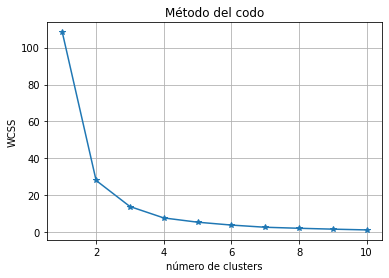

In [ ]:
#Ploteo el gráfico elbow-codo 
plt.plot(range(1,11),wcss,marker='*')
plt.title('Método del codo')
plt.xlabel('número de clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()


In [ ]:
#Uso el algortimo Kmeans con 3 clusters, según mi elección del gráfico anterior.
kmeans = KMeans(n_clusters=3, init ='k-means++', max_iter=300, n_init=10,random_state=0 )

#Ahora para cada obs le asigno su etiqueta.
y_kmeans = kmeans.fit_predict(x1)
y_kmeans

array([1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [ ]:
#Agrego la variable 'nivel' de etiquetas, la llamo x2
x2=pd.concat([x1,pd.DataFrame(y_kmeans)], axis=1)
x2.columns=['pc1','pc2','nivel']

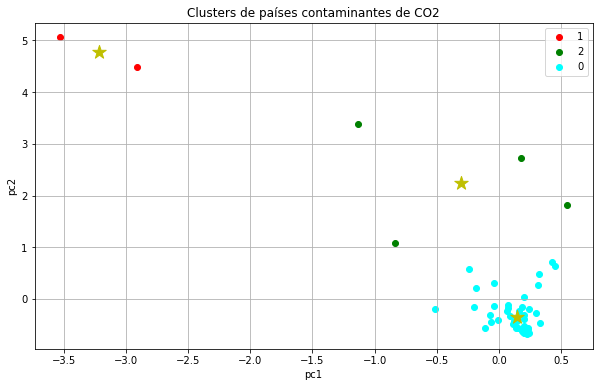

In [ ]:
#Ploteo cada observacion de x2 con  sus respectivos clusters y centroides.
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(1,1,1)

targets = x2['nivel'].unique()#['muy alto', 'alto', 'medio']
colors = ['r', 'g', 'cyan']
for target, color in zip(targets,colors):
  indice = x2['nivel'] == target
  ax.scatter(x2.loc[indice, 'pc1'], x2.loc[indice,'pc2'], c = color)

#for pais,x,y in zip(df['codigo'],x2['pc1'],x2['pc2']):
#  ax.text(x,y,pais,size=8)

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],marker='*', s=200, c='y', label = 'centroide')

plt.title('Clusters de países contaminantes de CO2')
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.legend(targets)
plt.grid()
plt.show()
